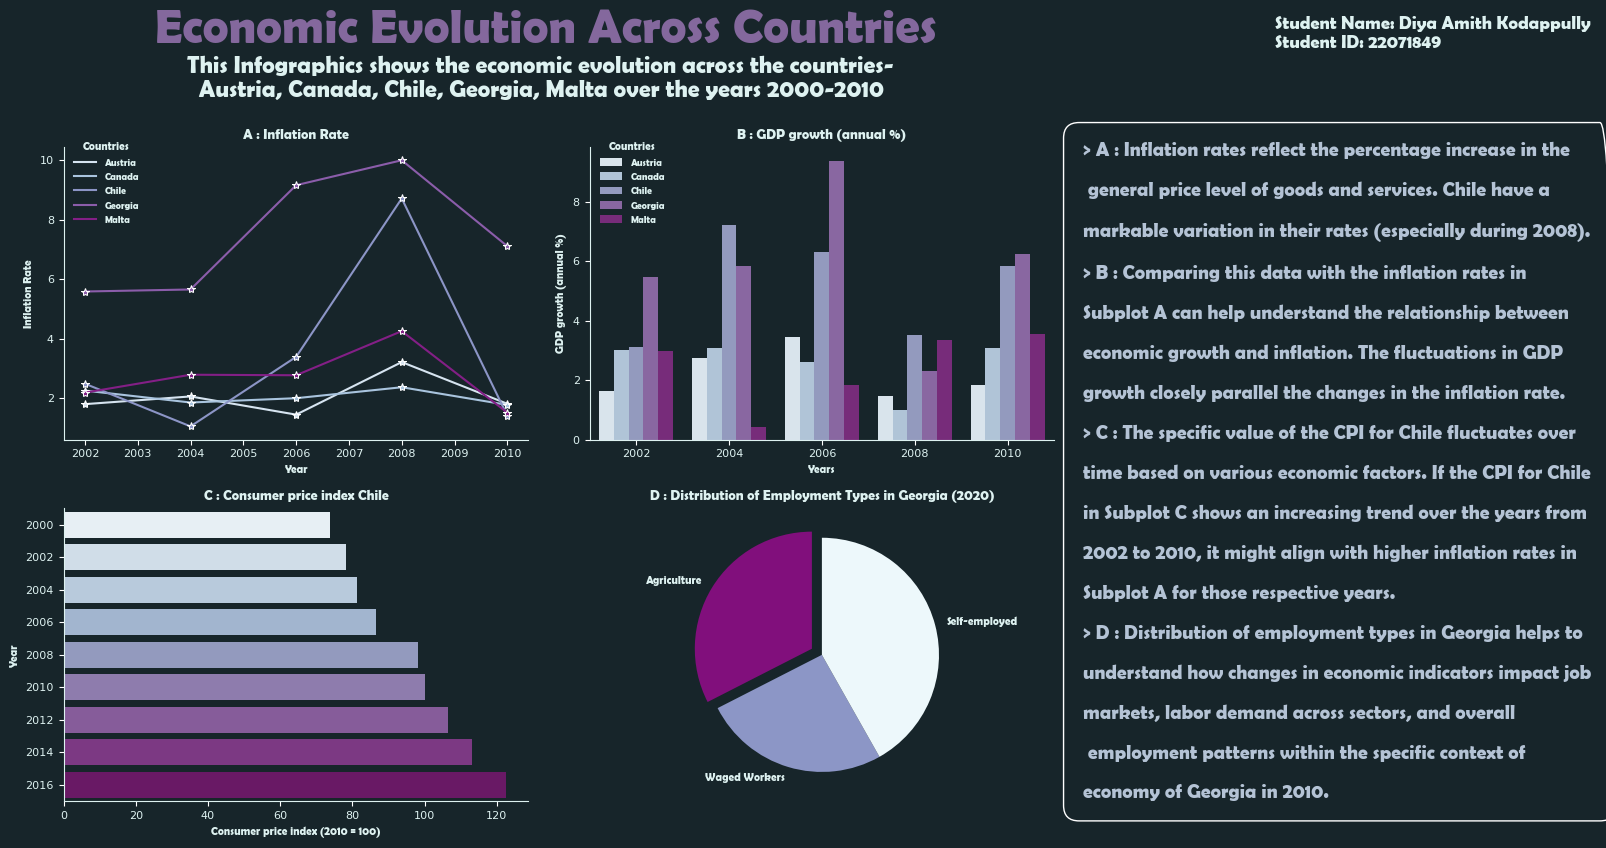

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import patheffects

# Load the dataset
economy_dataset = pd.read_csv('dataset.csv')

# Filter the countries and years
countries = ["Austria", "Chile", "Georgia", "Malta", "Canada"]
years = [2002, 2004, 2006, 2008, 2010]
dataset_selected = economy_dataset[economy_dataset['Country Name'].isin(
    countries) & economy_dataset['Year'].isin(years)]

# Create a figuree with required size
AX = plt.figure(figsize=(16, 9), facecolor='#17252A')


# Subplot A: Line plot for inflation rates
# Create a subplot with 2 rows, 3 columns, and index 1
ax1 = plt.subplot(2, 3, 1)
ax1.set_facecolor('#17252A')  # Set background color

# Plotting using seaborn
sns.lineplot(data=dataset_selected, x='Year', y='Inflation, consumer prices (annual %)',
             hue='Country Name', marker='*', palette='BuPu')

# Set title, labels, and formatting
plt.title('A : Inflation Rate', fontfamily='Berlin Sans FB Demi',
          fontsize=10, color='#DEF2F1')
plt.xlabel('Year', fontfamily='Berlin Sans FB Demi',
           fontsize=8, color='#DEF2F1')
plt.ylabel('Inflation Rate', fontfamily='Berlin Sans FB Demi',
           fontsize=8, color='#DEF2F1')
plt.grid(False)

# Customize the plot appearance
sns.despine(ax=ax1, left=False, right=True, top=True, bottom=False)
ax1.spines['bottom'].set_color('#DEF2F1')
ax1.spines['left'].set_color('#DEF2F1')

# Add legend and customize properties
plt.legend(title='Countries', loc='upper left', fontsize='8',
           frameon=False, bbox_to_anchor=(0, 1.05))
legend = plt.gca().get_legend()
title = legend.get_title()
title.set_color('#DEF2F1')
title.set_fontfamily('Berlin Sans FB Demi')
title.set_fontsize('8')
for text in legend.get_texts():
    text.set_color('#DEF2F1')
    text.set_fontfamily('Berlin Sans FB Demi')
    text.set_fontsize('7')

# Prepare data for the next part of the code
pivot_data = dataset_selected.pivot(
    index='Country Name', columns='Year', values='GDP growth (annual %)')
melted_data = pivot_data.reset_index().melt(
    id_vars='Country Name', var_name='Year', value_name='GDP growth (annual %)')

# Customize tick parameters
plt.tick_params(axis='x', labelsize=8, labelcolor='#DEF2F1', colors='white')
plt.tick_params(axis='y', labelsize=8, labelcolor='#DEF2F1', colors='white')


# Subplot B: Bar graph for GDP growth
# Create a subplot with 2 rows, 3 columns, and index 2
ax2 = plt.subplot(2, 3, 2)
ax2.set_facecolor('#17252A')  # Set background color

# Plotting using seaborn
sns.barplot(data=melted_data, x='Year', y='GDP growth (annual %)',
            hue='Country Name', palette='BuPu')

# Set title, labels, and formatting
plt.title('B : GDP growth (annual %)',
          fontfamily='Berlin Sans FB Demi', fontsize=10, color='#DEF2F1')
plt.xlabel('Years', fontfamily='Berlin Sans FB Demi',
           fontsize=8, color='#DEF2F1')
plt.ylabel('GDP growth (annual %)', fontfamily='Berlin Sans FB Demi',
           fontsize=8, color='#DEF2F1')
plt.grid(False)

# Customize the plot appearance
sns.despine(ax=ax2, left=False, right=True, top=True, bottom=False)
ax2.spines['bottom'].set_color('#DEF2F1')
ax2.spines['left'].set_color('#DEF2F1')

# Add legend and customize
plt.legend(title='Countries', loc='upper left', fontsize='8',
           frameon=False, bbox_to_anchor=(0, 1.05))
legend = plt.gca().get_legend()
title = legend.get_title()
title.set_color('#DEF2F1')
title.set_fontfamily('Berlin Sans FB Demi')
title.set_fontsize('8')
for text in legend.get_texts():
    text.set_color('#DEF2F1')
    text.set_fontfamily('Berlin Sans FB Demi')
    text.set_fontsize('7')

# Customize tick parameters
plt.tick_params(axis='x', labelsize=8, labelcolor='#DEF2F1', colors='white')
plt.tick_params(axis='y', labelsize=8, labelcolor='#DEF2F1', colors='white')


# Subplot C: Bar plot for Consumer Price Index (CPI) for Chile
# Create a subplot with 2 rows, 3 columns, and index 4
ax3 = plt.subplot(2, 3, 4)
ax3.set_facecolor('#17252A')  # Set background color

# Filter data for Chile
georgia_data = economy_dataset[(economy_dataset['Country Name'] == 'Chile')]

# Plotting using seaborn
sns.barplot(x='Consumer price index (2010 = 100)', y='Year',
            data=georgia_data, palette='BuPu', orient='h')

# Set title, labels, and formatting
plt.xlabel('Consumer price index (2010 = 100)',
           fontfamily='Berlin Sans FB Demi', fontsize=8, color='#DEF2F1')
plt.ylabel('Year', fontfamily='Berlin Sans FB Demi',
           fontsize=8, color='#DEF2F1')
plt.title('C : Consumer price index Chile',
          fontfamily='Berlin Sans FB Demi', fontsize=10, color='#DEF2F1')
plt.grid(False)

# Customize the plot appearance
sns.despine(ax=ax3, left=False, right=True, top=True, bottom=False)
ax3.spines['bottom'].set_color('#DEF2F1')
ax3.spines['left'].set_color('#DEF2F1')

# Customize tick parameters
plt.tick_params(axis='x', labelsize=8, labelcolor='#DEF2F1', colors='white')
plt.tick_params(axis='y', labelsize=8, labelcolor='#DEF2F1', colors='white')


# Subplot D : Pie chart for employement types
ax4 = plt.subplot(2, 3, 5)

# Filter data for Georgia in the year 2020
georgia_2020 = economy_dataset[(economy_dataset['Country Name'] == 'Georgia') & (
    economy_dataset['Year'] == 2010)]

# Define employment types and custom labels
employment_types = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)',
    'Self-employed, total (% of total employment) (modeled ILO estimate)'
]
custom_labels = ['Agriculture', 'Waged Workers', 'Self-employed']

# Extract data for specified employment types
employment_data = georgia_2020[employment_types]
total_employment = employment_data.sum()

# Define explode, colors, and plot the pie chart
explode = (0.1, 0, 0)
custom_colors = ['#810f7c', '#8c96c6', '#edf8fb']
pie = ax4.pie(total_employment, explode=explode,
              labels=custom_labels, startangle=90, colors=custom_colors)

# Set title and customize pie chart text
plt.title('D : Distribution of Employment Types in Georgia (2020)',
          color='#DEF2F1', fontfamily='Berlin Sans FB Demi', fontsize=10)
plt.setp(pie[1], fontfamily='Berlin Sans FB Demi', fontsize=8,
         color='#DEF2F1')


# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0,
                    top=6, wspace=0.4, hspace=0.4)

# Add a heading to the figure
heading = plt.figtext(0.1, 0.93, "Economic Evolution Across Countries",
                      fontfamily='Berlin Sans FB Demi', fontsize=35, color='#84689d')

# Add a subheading to the figure
subheading = plt.figtext(0.12, 0.87, 'This Infographics shows the economic evolution across the countries-\n  Austria, Canada, Chile, Georgia, Malta over the years 2000-2010',
                         fontfamily='Berlin Sans FB Demi', fontsize=17, color='#DEF2F1')

# Add a descrption to the figure
description = plt.figtext(0.68, 0.82, '> A : Inflation rates reflect the percentage increase in the\n\n general price level of goods and services.'
                          ' Chile have a \n\nmarkable variation in their rates (especially during 2008).'
                          '\n\n> B : Comparing this data with the inflation'
                          ' rates in \n\nSubplot A can help understand the relationship between \n\neconomic growth and inflation. The fluctuations in GDP\n\ngrowth closely parallel the changes in the inflation rate.'

                          '\n\n> C : The specific value of the CPI for Chile fluctuates over\n\ntime based on various economic factors. '
                          'If the CPI for Chile\n\nin Subplot C shows an increasing trend over the years from\n\n2002 to 2010, it might align with higher inflation rates in \n\nSubplot A for those respective years.'
                          '\n\n> D : Distribution of employment types in Georgia helps to \n\nunderstand how changes in economic indicators impact job \n\nmarkets, labor demand across sectors, and overall\n\n employment patterns within the specific context of\n\neconomy of Georgia in 2010.',
                          color='#b4c3d5', fontsize=14, fontfamily='Berlin Sans FB Demi', ha='left', va='top', bbox=dict(facecolor='none', edgecolor='white', boxstyle='round,pad=1,rounding_size=0.8'))

# Add student name and id to the figure
student_name_id = plt.figtext(0.8, 0.96, 'Student Name: Diya Amith Kodappully\nStudent ID: 22071849',
                              color='#DEF2F1', fontsize=13, fontfamily='Berlin Sans FB Demi', ha='left', va='top')

# Adjust layout to prevent overlapping of annotations
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as an image file
plt.show()